We will use the Lending Club P2P database taken from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club (but modified in order to make some more feature engineering).
Given historical data along with the outcome of the borrower (default? debt payed?) we want to build a ANN model that predict the behaviour of a future borrower based off the given features. In this way the company can assess if a potential customer is likely to pay back the loan or not and maybe update thereafter the interest rate, for example.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv')

In [3]:
data_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
data_info[data_info['LoanStatNew']=='mort_acc']['Description'].iloc[0]

'Number of mortgage accounts.'

In [5]:
def feat_info(col_name):
    print(data_info[data_info['LoanStatNew']==col_name].iloc[0]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
feat_info('loan_status')

Current status of the loan


In [11]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Our label to predict is indeed the loan_status; hence we are dealing with a binary classification problem. Let's start by checking if our dataframe is balanced with respect the label:

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

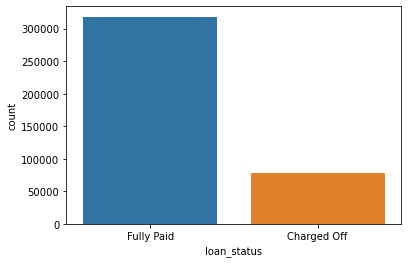

In [12]:
sns.countplot(df['loan_status'])

At a first sight it doesn't seem to be balanced, but on the other hand it's pretty reasonable that most of the people pay its debt, so it turns out to be kinda representative.

In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

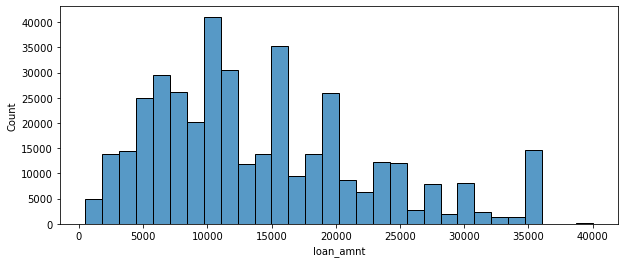

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['loan_amnt'],bins=30)

Let's take a look the correlation between the continuous features:

In [15]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

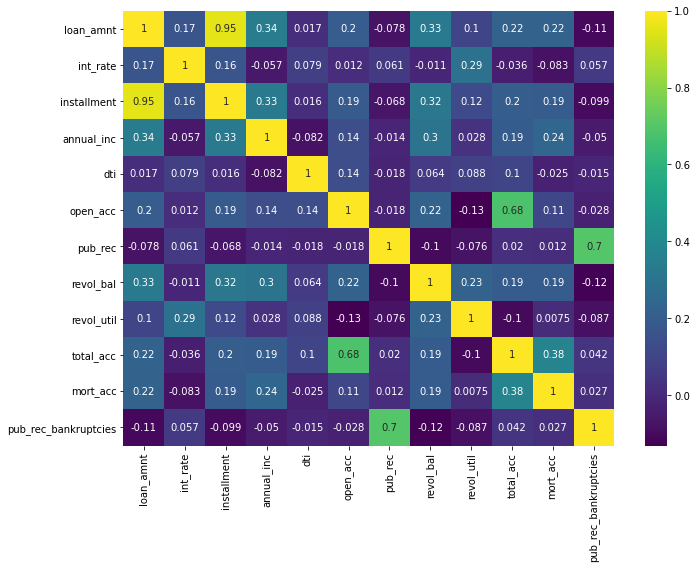

In [16]:
plt.figure(figsize=(11,8))

sns.heatmap(df.corr(),cmap='viridis',annot=True)

So there's high correlation between installment and our label.  Let's focus on this feature then.

In [17]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='Count'>

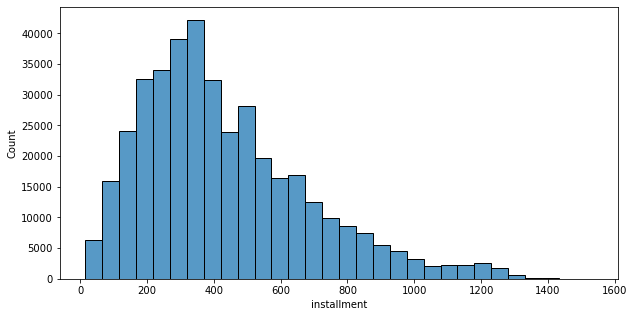

In [18]:
plt.figure(figsize=(10,5))


sns.histplot(df['installment'],bins=30)

In [19]:
df['installment'].mean()

431.84969802792716

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

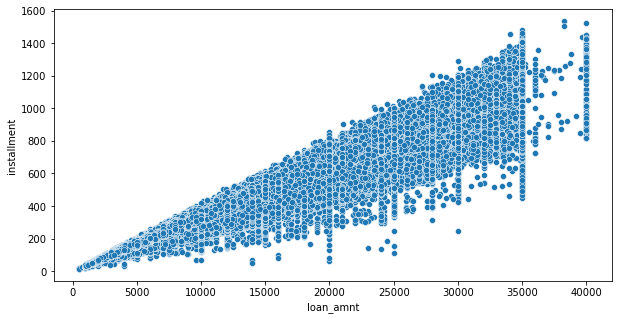

In [20]:
plt.figure(figsize=(10,5))


sns.scatterplot(x=df['loan_amnt'],y=df['installment'])

So higher loans allow, in proportion, lower installments.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

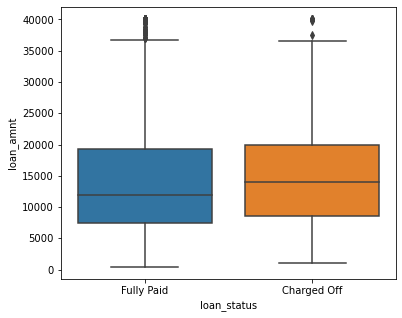

In [21]:
plt.figure(figsize=(6,5))


sns.boxplot(data=df,y='loan_amnt',x='loan_status')

This is intresting: the total amount of the loans seems to be paid back only for a half of it! But since we have seen in the very first histogram that the number of fully paid is considerably higher than charged off, this implies that the charged off loans were the highest ones. 

In [22]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


This confirms what just said. In particular we highlight that

In [23]:
def truncate(num, n):
    integer = int(num * (10**n))/(10**n)
    return float(integer)


co = df.groupby('loan_status')['loan_amnt'].count().iloc[0]
fp = df.groupby('loan_status')['loan_amnt'].count().iloc[1]
rat = truncate((co/fp)*100,4)
mco = truncate(df.groupby('loan_status')['loan_amnt'].mean().iloc[0],2)
mfp = truncate(df.groupby('loan_status')['loan_amnt'].mean().iloc[1],2)
percdiff = truncate((abs(mco-mfp))/(max(mco,mfp))*100,4)
wmco = truncate(mco/co,4)
wmfp = truncate(mfp/fp,4)
wrt = truncate((wmco/wmfp)*100,3)
wrt2 = truncate((wmco/wmfp),3)

In [24]:
print('The mean of total amount of paid loans is {mfp}$, while the mean of total amount of charged off loans is {mco}$.'.format(mfp=mfp,mco=mco))
print('Their percentual difference is approx {pd}% so they are quite similar, but their count is {fp} and {co}'.format(pd=percdiff,fp=fp,co=co))
print('respectively, whose ratio is approx {rat}%, which is not negligible.'.format(rat=rat))
print('Dividing the mean by total number of istances provides a more meaningful quantity a sort of weighted mean,')
print('which is {wmco} for CO and {wmfp} for FP loans. Their ratio is {rat2}%'.format(wmco=wmco,wmfp=wmfp,rat2=wrt))
print('This means that every borrower which eventually charged off the loan, started in average with a loan which')
print('was {wrt2} times the average loan of a borrower which eventually paid the loan.'.format(wrt2=wrt2))
print('What we can deduce so far is that it does not seem convenient for the company to allow high loans,')
print('therefore a possibility to be considered could be to increase interest rates for higher loans, and/or to set')
print('higher penalties for charging off higher loans.')


The mean of total amount of paid loans is 13866.87$, while the mean of total amount of charged off loans is 15126.3$.
Their percentual difference is approx 8.326% so they are quite similar, but their count is 318357 and 77673
respectively, whose ratio is approx 24.398%, which is not negligible.
Dividing the mean by total number of istances provides a more meaningful quantity a sort of weighted mean,
which is 0.1947 for CO and 0.0435 for FP loans. Their ratio is 447.586%
This means that every borrower which eventually charged off the loan, started in average with a loan which
was 4.475 times the average loan of a borrower which eventually paid the loan.
What we can deduce so far is that it does not seem convenient for the company to allow high loans,
therefore a possibility to be considered could be to increase interest rates for higher loans, and/or to set
higher penalties for charging off higher loans.


In [25]:
feat_info('grade')

LC assigned loan grade


In [26]:
feat_info('sub_grade')

LC assigned loan subgrade


In [27]:
print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [28]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

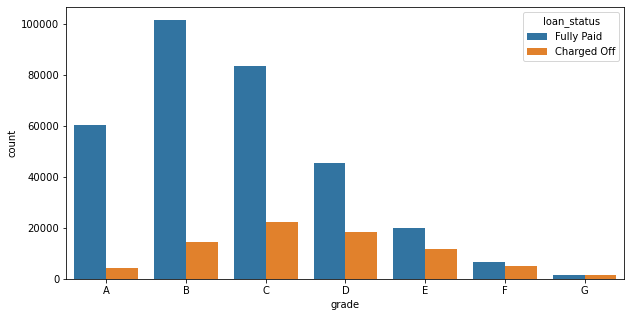

In [29]:
plt.figure(figsize=(10,5))


sns.countplot(df['grade'],order=sorted(df['grade'].unique()),hue=df['loan_status'])

For each loan grade, the lower the spread between FP and CO, the worse the grade for the company. In this case we can see that grades E, F, G have really low spread.

In [30]:
S = df.groupby(['grade','loan_status'])['loan_amnt'].count()
S

grade  loan_status
A      Charged Off      4036
       Fully Paid      60151
B      Charged Off     14587
       Fully Paid     101431
C      Charged Off     22449
       Fully Paid      83538
D      Charged Off     18338
       Fully Paid      45186
E      Charged Off     11765
       Fully Paid      19723
F      Charged Off      5037
       Fully Paid       6735
G      Charged Off      1461
       Fully Paid       1593
Name: loan_amnt, dtype: int64

In [31]:
gco = S.loc['G']['Charged Off']
gfp = S.loc['G']['Fully Paid']

gspr = (abs(gco-gfp))/(max(gco,gfp))*100


bco = S.loc['B']['Charged Off']
bfp = S.loc['B']['Fully Paid']

bspr = (abs(bco-bfp))/(max(bco,bfp))*100

In [32]:
print('The spread between CO and FP loans of grade G is {g}%, while for grade B is {b}%.'.format(g=gspr,b=bspr))

The spread between CO and FP loans of grade G is 8.286252354048965%, while for grade B is 85.61879504293559%.


/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

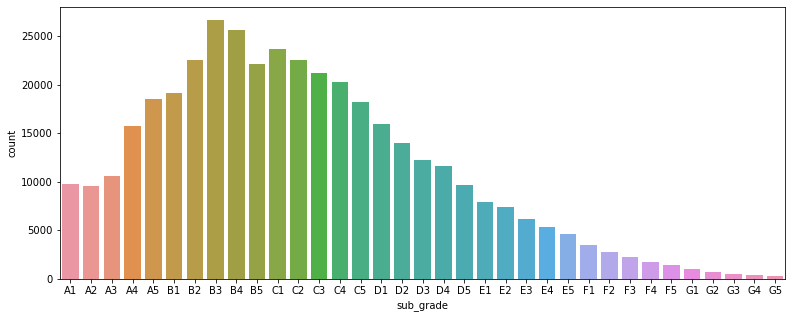

In [33]:
plt.figure(figsize=(13,5))


sns.countplot(df['sub_grade'],order=sorted(df['sub_grade'].unique()))

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

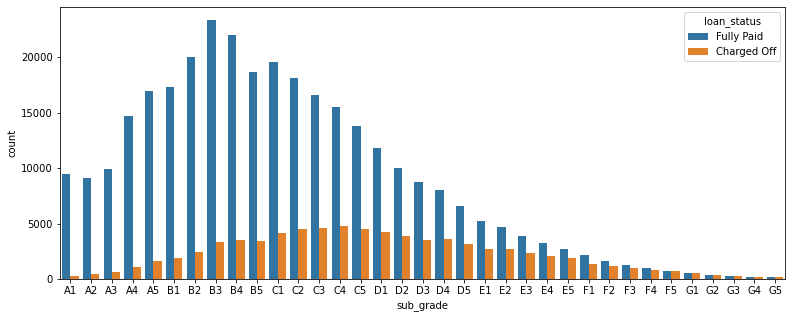

In [34]:
plt.figure(figsize=(13,5))

sns.countplot(df['sub_grade'],order=sorted(df['sub_grade'].unique()),hue=df['loan_status'])

What was a suspect with the grades, here seems to be confirmed, since it it just a more refined version of that. It looks like loans of grade F and G seem to be equally paid/not paid (equivalently, very low spread to use again the terminology above introduced), which is pretty bad for the company. So, let's focus on these two classes.

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

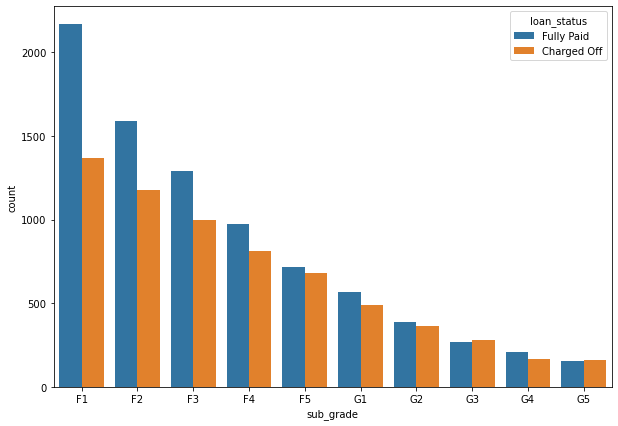

In [35]:
plt.figure(figsize=(10,7))

dfFD = df[(df['grade']=='F') | (df['grade']=='G')]

sns.countplot(dfFD['sub_grade'],order=sorted(dfFD['sub_grade'].unique()),hue=dfFD['loan_status'])

The biggest spread seems to be on grade F1, which is still kinda low:

In [36]:
T = df.groupby(['sub_grade','loan_status']).count().loc['F1']['loan_amnt']
T

loan_status
Charged Off    1370
Fully Paid     2166
Name: loan_amnt, dtype: int64

In [37]:
f1co = T['Charged Off']
f1fp = T['Fully Paid']
f1spr = (abs(f1co-f1fp))/(max(f1co,f1fp))*100

f1spr

36.749769159741454

In [38]:
df['loan_repaid'] = pd.get_dummies(df['loan_status'])['Fully Paid']

In [39]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [40]:
df.corr()['loan_repaid'].sort_values()[:-1].index

Index(['int_rate', 'revol_util', 'dti', 'loan_amnt', 'installment', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'total_acc',
       'annual_inc', 'mort_acc'],
      dtype='object')

<AxesSubplot:ylabel='loan_repaid'>

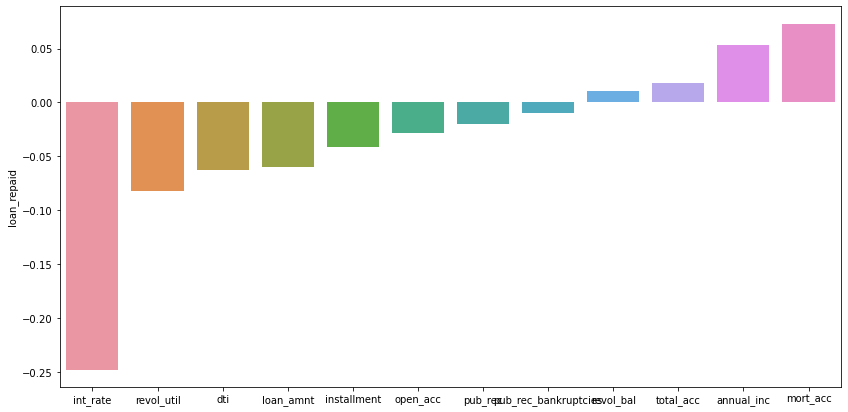

In [41]:
plt.figure(figsize=(14,7))


sns.barplot(x=df.corr()['loan_repaid'].sort_values()[:-1].index,y=df.corr()['loan_repaid'].sort_values()[:-1])

<AxesSubplot:>

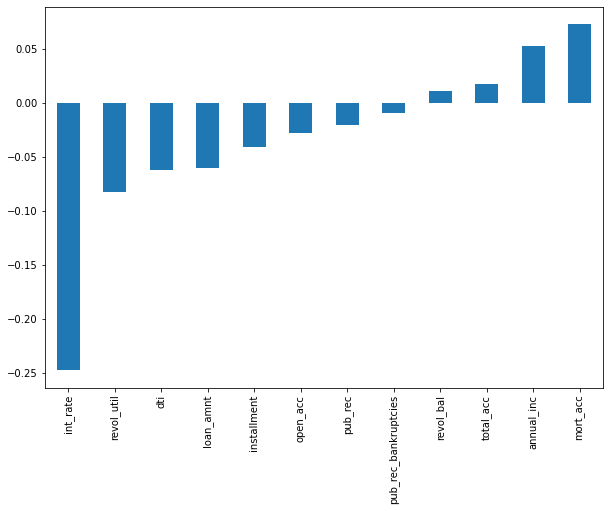

In [42]:
plt.figure(figsize=(10,7))


df.corr()['loan_repaid'].sort_values()[:-1].plot.bar()

#same result, simpler code

Let's now preprocess ourdata by filling the missing data, deleting redundant or unnecessary features and convert (when possible) categorical features into dummy variables.

In [43]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [44]:
ldf = len(df['loan_amnt'])
print('The length of our dataframe is {}.'.format(ldf))

The length of our dataframe is 396030.


In [45]:
a = np.array(df.columns)
b = []

for feat in a:
    b.append(df[feat].isnull().sum())

b=np.array(b)
null_feat=pd.Series(data=b,index=a)

In [46]:
null_feat

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

This series says how many units are without value in each feature; let's express this in percentage:

In [47]:
null_feat*(100/ldf)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [48]:
def trun(num):
    integer = int(num * (10**3))/(10**3)
    return float(integer)

In [49]:
(null_feat*(100/ldf)).apply(trun)

loan_amnt               0.000
term                    0.000
int_rate                0.000
installment             0.000
grade                   0.000
sub_grade               0.000
emp_title               5.789
emp_length              4.621
home_ownership          0.000
annual_inc              0.000
verification_status     0.000
issue_d                 0.000
loan_status             0.000
purpose                 0.000
title                   0.443
dti                     0.000
earliest_cr_line        0.000
open_acc                0.000
pub_rec                 0.000
revol_bal               0.000
revol_util              0.069
total_acc               0.000
initial_list_status     0.000
application_type        0.000
mort_acc                9.543
pub_rec_bankruptcies    0.135
address                 0.000
loan_repaid             0.000
dtype: float64

In [50]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [51]:
df['emp_title'].nunique()

173105

In [52]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
Southbury Tree Service, INC           1
River Park Exp. Car Wash              1
Silver Oaks                           1
Republic Airways Holdings, Inc.       1
NYC DEPT. OF EDUCATION                1
Name: emp_title, Length: 173105, dtype: int64

There are too many different jobs to turn this feature into a dummy variable. Let's remove it:

In [53]:
df = df.drop('emp_title',axis=1)

In [54]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

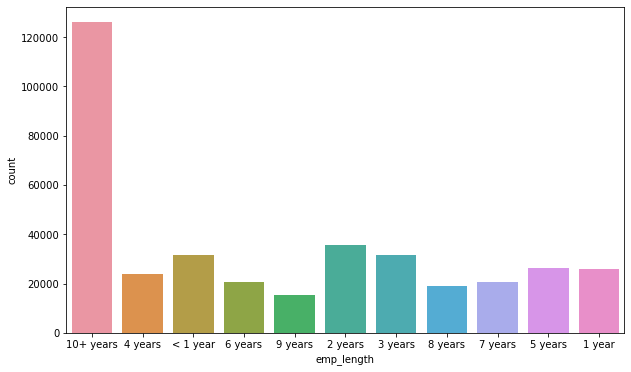

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(df['emp_length'])

In [56]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [57]:
emp_len_ord = ['< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']


/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

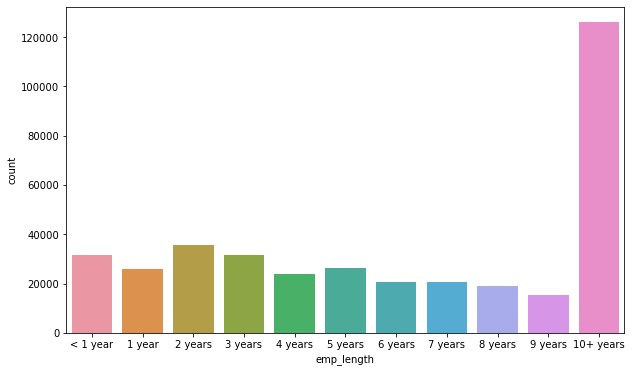

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(df['emp_length'],order=emp_len_ord)

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

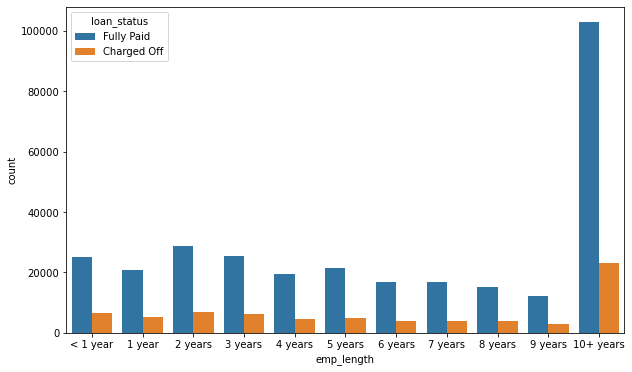

In [59]:
plt.figure(figsize=(10,6))

sns.countplot(df['emp_length'], order=emp_len_ord, hue=df['loan_status'])

We create now a series broadcasting the percentage of charge offs grouped by employment's length

In [60]:
df.groupby('emp_length').count()['loan_repaid']

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_repaid, dtype: int64

In [61]:
perc=[]

for i in range(len(emp_len_ord)):
    a = df.groupby('emp_length').count()['loan_repaid'].iloc[i]
    b = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid'].iloc[i]
    c = trun((b/a)*100)
    perc.append(c)

perc_co_by_emp_len = pd.Series(perc,index=df.groupby('emp_length').count()['loan_repaid'].index)

In [62]:
perc_co_by_emp_len

emp_length
1 year       19.913
10+ years    18.418
2 years      19.326
3 years      19.523
4 years      19.238
5 years      19.218
6 years      18.919
7 years      19.477
8 years      19.976
9 years      20.047
< 1 year     20.687
dtype: float64

<AxesSubplot:xlabel='emp_length'>

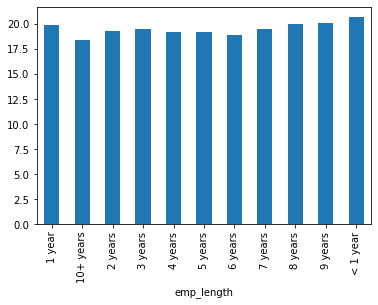

In [63]:
perc_co_by_emp_len.plot(kind='bar')

Another way to do the same:

In [64]:
emp_tot = df.groupby('emp_length').count()['loan_repaid']

In [65]:
emp_co = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']

In [66]:
perc_co = (emp_co/emp_tot)*100
perc_co = perc_co.apply(trun)

In [67]:
perc_co

emp_length
1 year       19.913
10+ years    18.418
2 years      19.326
3 years      19.523
4 years      19.238
5 years      19.218
6 years      18.919
7 years      19.477
8 years      19.976
9 years      20.047
< 1 year     20.687
Name: loan_repaid, dtype: float64

We see that charge off are very homogeneously distributed along the different employment lengths, therefore emp_length it's not a useful feature.

In [68]:
df = df.drop('emp_length',axis=1)

Let's see now which are the features having empty slots:

In [69]:
a = np.array(df.columns)
b = []

for feat in a:
    b.append(df[feat].isnull().sum())

b=np.array(b)
null_feat=pd.Series(data=b,index=a)

In [70]:
null_feat

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [71]:
feat_info('title')

The loan title provided by the borrower


In [72]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [73]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [74]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

It seems that the former is a more detalied version of the latter. So let us drop this last one:

In [75]:
df = df.drop('title',axis=1)

Let's now take a look to mort_acc

In [76]:
feat_info('mort_acc')

Number of mortgage accounts.


In [77]:
df['mort_acc'].nunique()

33

In [78]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

There are several possibilities to deal with the missing data of this feature. I will start by checking the correlation between this feature and the others:

In [79]:
df.corr()['mort_acc'].sort_values(ascending=True)

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [80]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


Hence it makes sense that total_acc is somehow correlated with mort_acc.

In [81]:
ser = df.groupby('total_acc').mean()['mort_acc']
ser

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let us fill the missing values of mort_acc, basing them off the above series.

**Method 1**

In [82]:
a=[]
#df['mort_full']=''
def f(x):
    if pd.isnull(x[1])==True:
        a.append(ser[x[0]])
    else:
        a.append(x[1])     

In [83]:
df[['total_acc','mort_acc']].apply(f,axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
396025    None
396026    None
396027    None
396028    None
396029    None
Length: 396030, dtype: object

In [84]:
df['mort_full'] = pd.Series(a) 

In [85]:
df[['total_acc','mort_acc','mort_full']]

,total_acc,mort_acc,mort_full
0,25.0,0.0,0.000000
1,27.0,3.0,3.000000
2,26.0,0.0,0.000000
3,13.0,0.0,0.000000
4,43.0,1.0,1.000000
...,...,...,...
396025,23.0,0.0,0.000000
396026,8.0,1.0,1.000000
396027,23.0,0.0,0.000000
396028,20.0,5.0,5.000000


**Method 2**

In [86]:
def g(x,y):
    if pd.isnull(y)==True:
        return ser[x]
    else:
        return y

In [87]:
df['mort_full2']=df[['total_acc','mort_acc']].apply(lambda x:g(x.total_acc,x.mort_acc),axis=1)

In [88]:
df['mort_full2']

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_full2, Length: 396030, dtype: float64

**Method 3** It is all commented since it is extremely unefficient.

In [89]:
#l=len(df['mort_acc'])
#df['mort_full3']=''

#for i in range(l):
#    if pd.isnull(df['mort_acc'][i])==True:
#        a = df['total_acc'][i]
#        df['mort_full3'][i] = ser[a]
#    else:
#        df['mort_full3'][i] = df['mort_acc'][i]

Let's now put some order in our dataframe

In [90]:
df['mort_acc']=df['mort_full2']

df = df.drop(['mort_full','mort_full2'],axis=1)

In [91]:
a = np.array(df.columns)
b = []

for feat in a:
    b.append(df[feat].isnull().sum())

b=np.array(b)
null_feat=pd.Series(data=b,index=a)

In [92]:
null_feat

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

The missing values are now really few, less than 0.5% of the total data: let's just delete those rows:

In [93]:
df = df.dropna()

We want now to list all the non numeric features, then study them in order to turn them into dummy variables when possible. 

In [94]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               uint8
dtype: object

In [95]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [96]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [97]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [98]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [99]:
def to_num(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [100]:
df['term'] = df['term'].apply(to_num)

We already noticed that the feature 'grade' is a just a broad version of the feat 'sub_grade', so we drop the former and we turn into dummy variable the latter.

In [101]:
df=df.drop('grade',axis=1)

In [102]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [103]:
df2 = pd.get_dummies(df['sub_grade'])

In [104]:
df = pd.concat([df,df2],axis=1)

In [105]:
df = df.drop('sub_grade',axis=1)

In [106]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

In [107]:
# a quicker call is the following

#pd.get_dummies(df,columns=['sub_grade'],drop_first=True)

In [108]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [109]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [110]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

Keep checking, it turns out that we can treat 'application_type','initial_list_status','purpose' like 'verification_status'; so let's turn them into dummy variable

In [111]:
df = pd.get_dummies(df,columns=['verification_status','application_type','initial_list_status','purpose'],drop_first=True)

In [112]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A1',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation',

In [113]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [114]:
df['home_ownership'].replace(to_replace=['NONE','ANY'],value='OTHER',inplace=True)

In [115]:
df = pd.get_dummies(df,columns=['home_ownership'],drop_first=True)

In [116]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [117]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

We can extract the zip code from this last feature:

In [118]:
df['zip_code'] = df['address'].apply(lambda a:int(a.split()[-1]))
df.drop('address',axis=1,inplace=True)

In [119]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

There are just few zip codes, so it worth it to turn this feature into a dummy variable:

In [120]:
df = pd.get_dummies(df,columns=['zip_code'],drop_first=True)

In [121]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [122]:
feat_info('issue_d')

The month which the loan was funded


In our model we don't know a priori if the loan is given or not (that's why we are building this model, actually!), so we drop this feature.

In [123]:
df.drop('issue_d',axis=1,inplace=True)

In [124]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [125]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda data:int(data.split('-')[1]))
df.drop('earliest_cr_line',axis=1,inplace=True)

In [126]:
df[['loan_status','loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


In [127]:
df = df.drop('loan_status',axis=1)

In [128]:
#df2 = df.sample(frac=0.1,random_state=101)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [134]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [136]:
X.shape

(395219, 79)

In [137]:
model = Sequential()

model.add(Dense(units=79, activation='relu'))
model.add(Dense(units=39, activation='relu'))
model.add(Dense(units=19, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='mse',optimizer='adam')

In [138]:
model.fit(x=X_train,
          y=y_train,
         epochs=30,
         validation_data=(X_test,y_test),
         verbose=1,
         batch_size=256)

Epoch 1/30
1236/1236 [==============================] - 1s 717us/step - loss: 0.1073 - val_loss: 0.0839
Epoch 2/30
1236/1236 [==============================] - 1s 513us/step - loss: 0.0835 - val_loss: 0.0836
Epoch 3/30
1236/1236 [==============================] - 1s 503us/step - loss: 0.0831 - val_loss: 0.0834
Epoch 4/30
1236/1236 [==============================] - 1s 494us/step - loss: 0.0825 - val_loss: 0.0831
Epoch 5/30
1236/1236 [==============================] - 1s 506us/step - loss: 0.0828 - val_loss: 0.0833
Epoch 6/30
1236/1236 [==============================] - 1s 516us/step - loss: 0.0819 - val_loss: 0.0831
Epoch 7/30
1236/1236 [==============================] - 1s 507us/step - loss: 0.0820 - val_loss: 0.0830
Epoch 8/30
1236/1236 [==============================] - 1s 490us/step - loss: 0.0814 - val_loss: 0.0832
Epoch 9/30
1236/1236 [==============================] - 1s 490us/step - loss: 0.0809 - val_loss: 0.0831
Epoch 10/30
1236/1236 [==============================] - 1s 539u

In [139]:
from tensorflow.keras.models import load_model

In [140]:
model.save('P2P_LendingClub.h5')

In [141]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

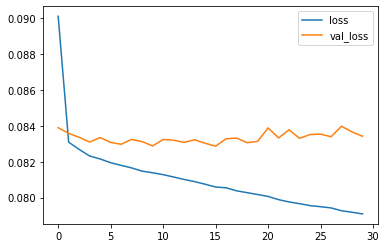

In [142]:
model_loss.plot()

In [143]:
pred = (model.predict(X_test) > 0.5).astype("int32")

In [144]:
from sklearn.metrics import classification_report, confusion_matrix

In [145]:
print(classification_report(pred,y_test))
print('\n')
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.48      0.90      0.63      8320
           1       0.99      0.88      0.93     70724

    accuracy                           0.89     79044
   macro avg       0.73      0.89      0.78     79044
weighted avg       0.93      0.89      0.90     79044



[[ 7518   802]
 [ 8140 62584]]


Let's now pick a random customer and let's check if I would offer him/her the loan

In [181]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind].values.reshape(1,79)

In [182]:
(model.predict(new_customer) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [179]:
df.iloc[random_ind]['loan_repaid']

1.0

They match, hence the model seems to work!